In [5]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

data = './car.csv'
df= pd.read_csv(data, header=None)

print("Data dimensions")
print(df.shape, "\n")
print("Data Snapshot - First 10 records")
df.head(10)

Data dimensions
(1728, 7) 

Data Snapshot - First 10 records


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Exploratory Data Analysis

In [61]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [62]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [64]:
# Target Variable is "buying" column, check distribution.

df['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [65]:
# Check for any missing values if any
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Feature Vector and Target Variable


In [66]:
X=pd.get_dummies(df.drop(['buying'], axis=1))
y=df['buying'] 

In [47]:
X.head()

,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encode categorical variables
le.fit(df["buying"])
buying = le.transform(df["buying"])
le.classes_

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [68]:
print(buying)

[3 3 3 ... 1 1 1]


# Split data into Training and Test set

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, 
    random_state = 42
    )

In [70]:
X_train.shape, X_test.shape

((1157, 21), (571, 21))

In [71]:
X_train.head()

,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
48,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
468,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
155,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1721,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1208,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [72]:
X_test.head()

,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
599,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1201,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
628,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
1498,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
1263,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# Decision Tree Classifier


In [73]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [74]:
y_pred_gini = clf_gini.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2680


In [76]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.3146


In [77]:
# Check overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.3146
Test set score: 0.2680


[Text(0.5769230769230769, 0.875, 'X[18] <= 0.5\ngini = 0.75\nsamples = 1157\nvalue = [291, 286, 293, 287]'),
 Text(0.3076923076923077, 0.625, 'X[20] <= 0.5\ngini = 0.749\nsamples = 1108\nvalue = [291, 254, 276, 287]'),
 Text(0.15384615384615385, 0.375, 'X[8] <= 0.5\ngini = 0.748\nsamples = 1068\nvalue = [291, 230, 260, 287]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.742\nsamples = 693\nvalue = [200, 127, 165, 201]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.749\nsamples = 375\nvalue = [91, 103, 95, 86]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= 0.5\ngini = 0.48\nsamples = 40\nvalue = [0, 24, 16, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.498\nsamples = 30\nvalue = [0, 14, 16, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.8461538461538461, 0.625, 'X[2] <= 0.5\ngini = 0.453\nsamples = 49\nvalue = [0, 32, 17, 0]'),
 Text(0.7692307692307693, 0.375, 'X[5] <= 0.5\ngini = 0.5\nsamples = 34\nvalue = [0, 17, 17, 0]'),
 Text(0

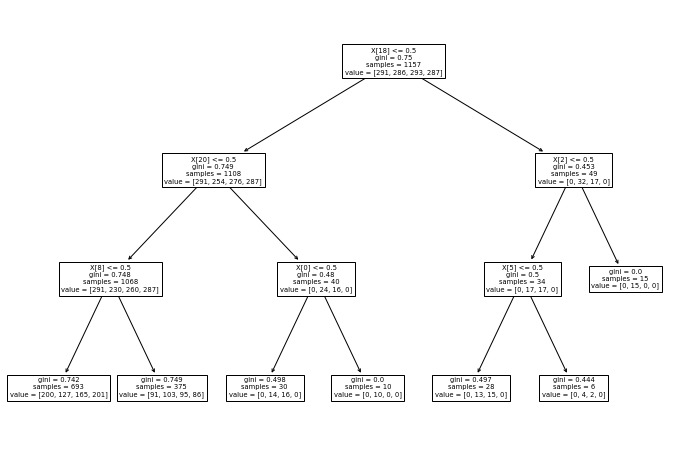

In [78]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 